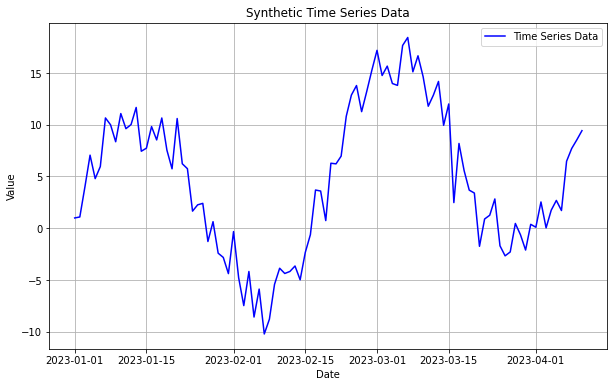

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
num_points = 100
time_index = pd.date_range(start='2023-01-01', periods=num_points, freq='D')
trend = 0.1 * np.arange(num_points)
seasonality = 10 * np.sin(np.linspace(0, 4 * np.pi, num_points))
noise = np.random.normal(loc=0, scale=2, size=num_points)
time_series_data = trend + seasonality + noise

# Create a DataFrame with the time series data
df = pd.DataFrame({'Date': time_index, 'Value': time_series_data})

df=df.set_index('Date')

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df, label='Time Series Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Synthetic Time Series Data')
plt.legend()
plt.grid(True)

In [25]:
df

,Value
Date,
2023-01-01,0.993428
2023-01-02,1.089396
2023-01-03,4.006857
2023-01-04,7.062684
2023-01-05,4.793661
...,...
2023-04-06,1.711003
2023-04-07,6.475616
2023-04-08,7.710631


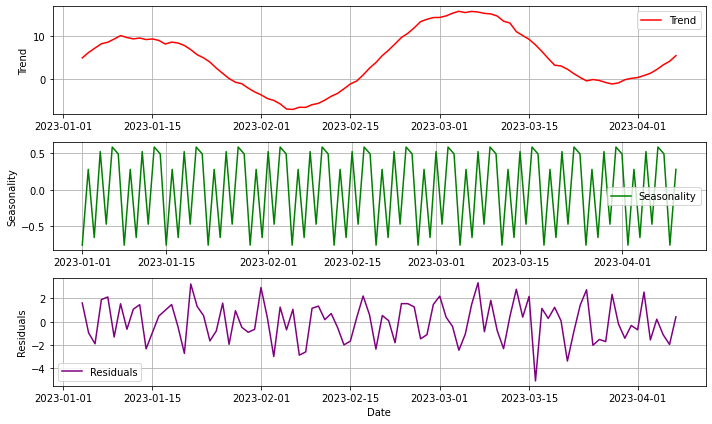

In [22]:
# Decompose the time series data into components (trend, seasonality, and residuals)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive')

trend_component = decomposition.trend
seasonal_component = decomposition.seasonal
residuals = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(trend_component, label='Trend', color='red')
plt.ylabel('Trend')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(seasonal_component, label='Seasonality', color='green')
plt.ylabel('Seasonality')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(residuals, label='Residuals', color='purple')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

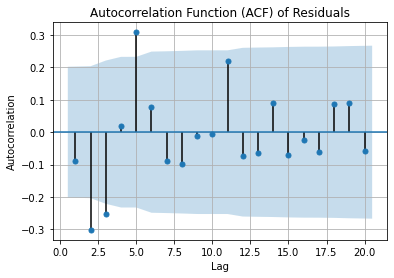

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Generate synthetic time series data (same as before)
np.random.seed(42)
num_points = 100
time_index = pd.date_range(start='2023-01-01', periods=num_points, freq='D')
trend = 0.1 * np.arange(num_points)
seasonality = 10 * np.sin(np.linspace(0, 4 * np.pi, num_points))
noise = np.random.normal(loc=0, scale=2, size=num_points)
time_series_data = trend + seasonality + noise
df = pd.DataFrame({'Date': time_index, 'Value': time_series_data})
df=df.set_index('Date')

# Decompose the time series data into components (same as before)
decomposition = seasonal_decompose(df, model='additive')
trend_component = decomposition.trend
seasonal_component = decomposition.seasonal
residuals = decomposition.resid

# Plot the ACF of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals.dropna(), lags=20, zero=False)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.grid(True)
plt.show()
